<a href="https://colab.research.google.com/github/atesno/sokratesm/blob/main/prediksihargarumah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Let's get started!

# KC_Housesales_Data
- Predict House sale prices using Multi-Linear Regression
- Predict the sales of houses in King County with an accuracy of at least 75-80% and
- understand which factors are responsible for higher property value  "$650K and above."


### Import Libraries

In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

#basic eda packages
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib import rcParams
rcParams['figure.figsize'] = 7, 5
pd.options.display.max_columns = 25
sns.set(style='darkgrid')

#validation
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
df = pd.read_csv('/content/sample_data/kc_house_data.csv')

In [ ]:
df.head()

> # Basic eda checks

In [ ]:
print("Shape of the data :",df.shape)

Shape of the data : (21597, 21)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Cleaning

In [ ]:
pd.DataFrame(df.isna().sum()).T

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Here their are no null values found!!

**correlation** w.r.t price

In [57]:
import pandas as pd

# Contoh membaca data (sesuaikan dengan path Anda)
# df = pd.read_csv('path_to_your_file.csv')

# Memeriksa apakah df ada dan berisi data
print("DataFrame df:")
print(df.head())

# Pastikan kolom 'price' ada di DataFrame
if 'price' in df.columns:
    print("Kolom 'price' ada di DataFrame.")

    # Memeriksa tipe data kolom
    if pd.api.types.is_numeric_dtype(df['price']):
        # Menghitung korelasi dengan kolom 'price'


        # Konversi Series menjadi DataFrame dan mengganti nama kolom


        # Mengurutkan berdasarkan kolom 'correlation_with_price'


        # Menampilkan hasil
        print("Korelasi dengan kolom 'price':")

    else:
        print("Kolom 'price' bukan tipe data numerik.")
else:
    print("Kolom 'price' tidak ditemukan di DataFrame.")


DataFrame df:
           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178

# lets plot the data

Counter({3: 9824, 4: 6882, 2: 2760, 5: 1601, 6: 272, 1: 196, 7: 38, 8: 13, 9: 6, 10: 3, 11: 1, 33: 1})


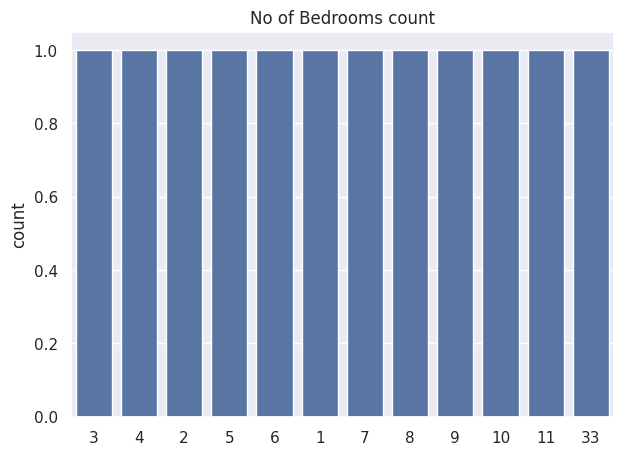

In [58]:
print(Counter(df.bedrooms))
sns.countplot(df.bedrooms,order=df.bedrooms.value_counts().index);
plt.title("No of Bedrooms count");

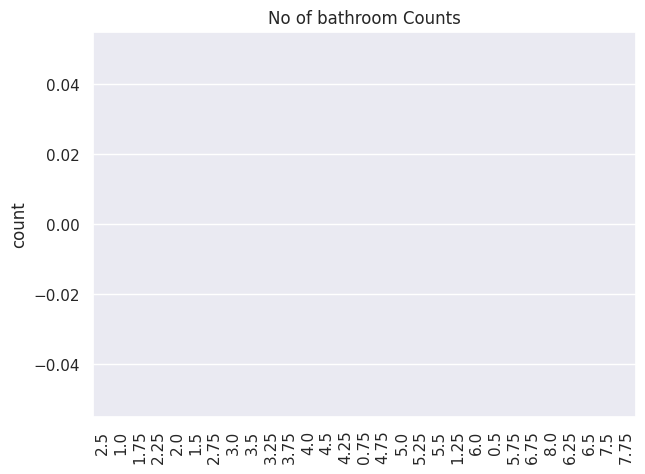

In [ ]:
plt.xticks(rotation=90)
sns.countplot(df.bathrooms,order=df.bathrooms.value_counts().index);
plt.title('No of bathroom Counts');

Counter({1.0: 10673, 2.0: 8235, 1.5: 1910, 3.0: 611, 2.5: 161, 3.5: 7})


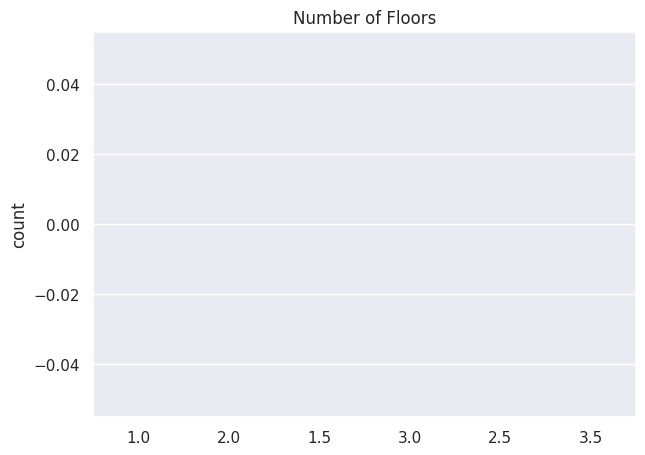

In [ ]:
print(Counter(df.floors))
sns.countplot(df.floors,order=df.floors.value_counts().index);
plt.title("Number of Floors");

Lets have handson on pie chart as well!!

Counter({0: 21434, 1: 163})


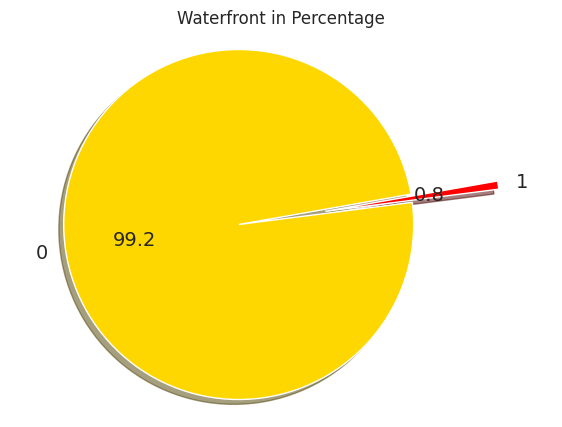

In [ ]:
print(Counter(df.waterfront))
plt.pie(df.waterfront.value_counts(),explode=[0,0.5],\
        autopct="%01.1f",labels=df.waterfront.unique(),shadow=True,startangle=10,colors=['gold','red'],\
        textprops={'fontsize': 14});
plt.axis("equal");
plt.title('Waterfront in Percentage');

Counter({0: 19475, 2: 961, 3: 510, 1: 332, 4: 319})


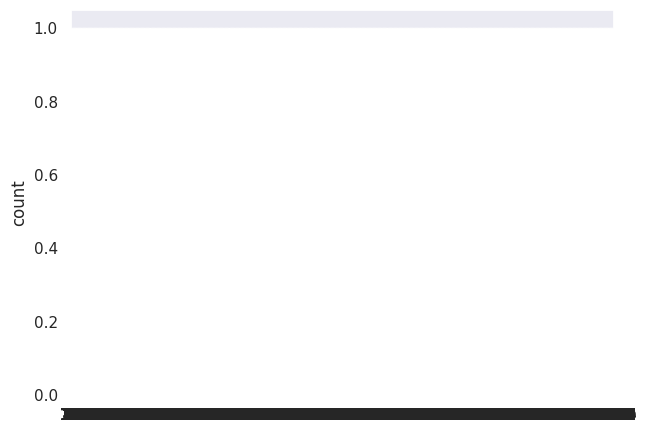

In [54]:
print(Counter(df.view))
sns.countplot(df.view);

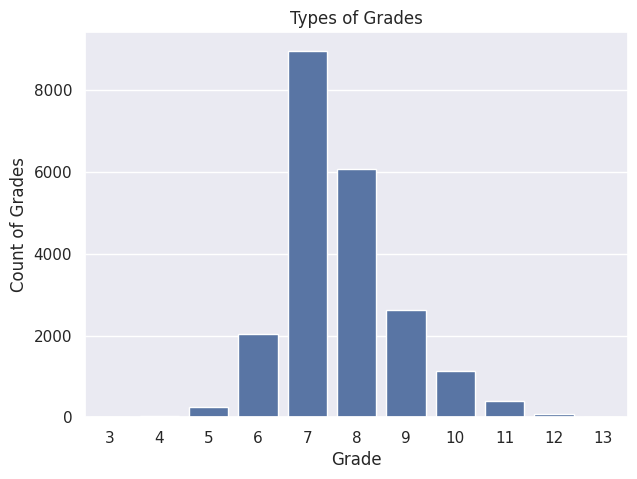

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Menghitung frekuensi nilai kolom 'grade'
grade_counts = Counter(df['grade'])

# Membuat plot bar
sns.barplot(x=list(grade_counts.keys()), y=list(grade_counts.values()))

# Menambahkan label dan judul
plt.xlabel("Grade")
plt.ylabel("Count of Grades")
plt.title("Types of Grades")

# Menampilkan plot
plt.show()

### Feature engineering
- and yea it's a vast topic but i just went with basics here

lets drop the non contribution variables here

In [61]:
unwanted = ['id','date']
df.drop(unwanted,axis=1,inplace=True)

In [62]:
df.head() #id and data variable coll is droped

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Here we'll calculate the number of year's between present year and mentioned year in the data

In [63]:
df['built_age'] = 2020 - df.yr_built
df.drop('yr_built',axis=1,inplace=True)

In [64]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,built_age
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,-122.257,1340,5650,65


## Split the data

In [65]:
X = list(df.iloc[:,1:].values) # independent variables
y = df.price.values # dependent variable

# Scaling the data

In [66]:
sn = StandardScaler()
X = sn.fit_transform(X)
X

array([[-0.40290302, -1.45107268, -0.98065209, ..., -0.94367562,
        -0.26062671,  0.54467809],
       [-0.40290302,  0.17448579,  0.53336915, ..., -0.43288674,
        -0.18769961,  0.68085037],
       [-1.48249316, -1.45107268, -1.4272339 , ...,  1.07029196,
        -0.17219022,  1.29362563],
       ...,
       [-1.48249316, -1.77618438, -1.15492792, ..., -1.41068259,
        -0.39419807, -1.29364769],
       [-0.40290302,  0.49959749, -0.52317805, ..., -0.84151784,
        -0.42059702, -1.12343234],
       [-1.48249316, -1.77618438, -1.15492792, ..., -1.41068259,
        -0.41803046, -1.25960462]])

- We'll check the distrubution of the dependent variable

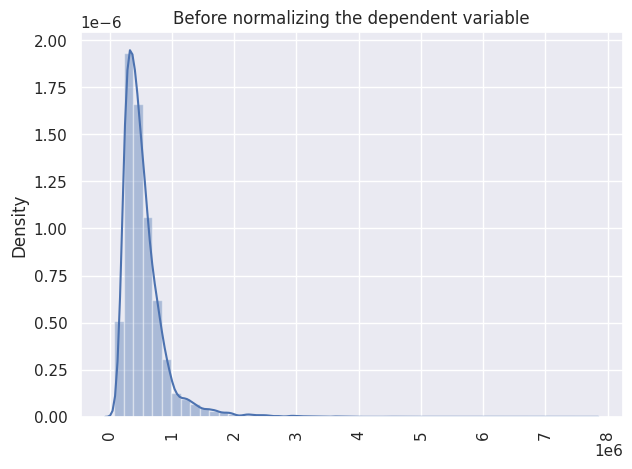

In [67]:
sns.distplot(y);
plt.xticks(rotation=90);
plt.title("Before normalizing the dependent variable");

- Here we can see that data is "Highly positively skewed"
- Lets normalize the y variable (dependent variable)

This is also called as normal gaussian distribution


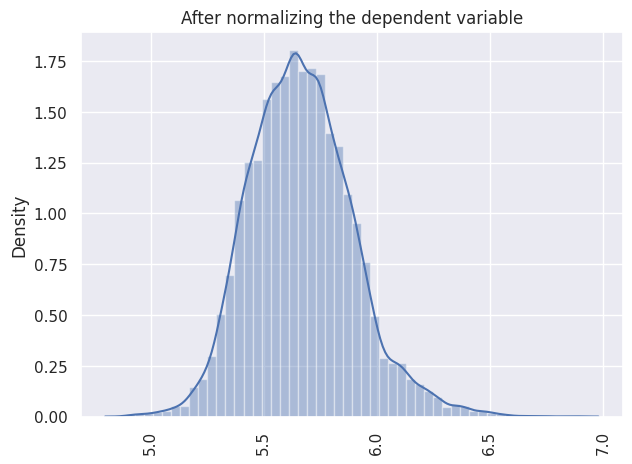

In [68]:
y = np.log10(y)
#we just normalized the y variable using log10 which is available in numpy package
#now lets plot the data

sns.distplot(y);
plt.xticks(rotation=90);
plt.title("After normalizing the dependent variable");
print("This is also called as normal gaussian distribution")

# Preprocessing
- We start machine learning by setting the features and target:

- Features: x
- Target: y

Then, we split them to train and test sets

In [69]:
X_train ,X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape) #printing the shape of splited data

(17277, 18) (4320, 18) (17277,) (4320,)


# Machine learning
> here i have taken 2 regression algorithms i.e
- LinearRegression
- RandomForestRegressor


- Here we'er calculating both train and test data so that we can check if the data is overfitted , underfitted of optimal in state

# 1. LinearRegression

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Misalkan Anda sudah memiliki X dan y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur jika diperlukan (disarankan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat model Linear Regression
model_line = LinearRegression(fit_intercept=True, n_jobs=1)

# Melatih model
model_line.fit(X_train_scaled, y_train)

# Membuat prediksi
y_train_pred = model_line.predict(X_train_scaled)
y_pred = model_line.predict(X_test_scaled)

# Menilai kinerja model
print("Train score:", r2_score(y_train, y_train_pred))
print("Test score:", r2_score(y_test, y_pred))

Train score: 0.7706400955847341
Test score: 0.7698922312576119


# 2.RandomForestRegressor

In [71]:
model = RandomForestRegressor(n_estimators=190,max_depth=100,random_state=25,max_features='auto',n_jobs=1)
model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)


print("Train score:",r2_score(y_train,y_train_pred))
print("Test score:",r2_score(y_test,y_pred))

Train score: 0.9825717055375823
Test score: 0.8890603628660629


## If you made it this far, thank you for your attention.
### In order to improve my score, I will keep updating this kernel by:

- Creating new features
- normalizing the data
- I will bring more updates, stay tuned!

#### if you find this kernal helpfull please vote :)